In [46]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, InputLayer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam 
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import backend as k


### Loading & Visualisation Data

In [47]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [48]:
x_train.shape , y_train.shape 

((60000, 28, 28), (60000,))

In [49]:
x_test.shape , y_test.shape 

((10000, 28, 28), (10000,))

In [50]:
y_train[0:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

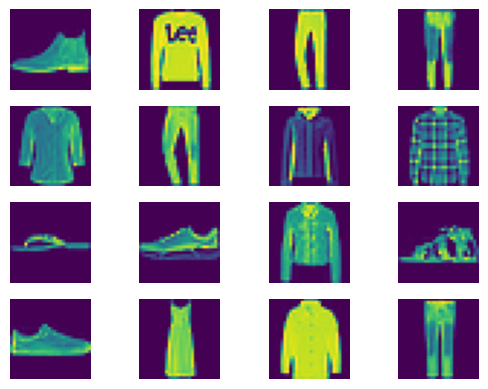

In [51]:
for i, image in enumerate(x_test[:16]):
    plt.subplot(4, 4, i+1)
    plt.imshow(image)
    plt.axis("off")

### Data Preprocessing

In [52]:
x_train = x_train / 255.0
x_test = x_test / 255.0

### Model Preparation

In [53]:
_,HEIGHT,WIDTH= x_train.shape
print(HEIGHT, WIDTH)

28 28


In [71]:
k.clear_session()
model=Sequential([
    InputLayer(shape=(HEIGHT,WIDTH,)),
    Flatten(),
    Dense(128, activation="relu"),
    Dense(128, activation="relu"),
    Dense(64, activation="relu"),
    Dense(10, activation="sigmoid")
])

In [72]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 125,898 (491.79 KB)

 Trainable params: 125,898 (491.79 KB)

 Non-trainable params: 0 (0.00 B)

In [73]:
tf.keras.utils.plot_model(model, "model.png",True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [74]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [75]:
# import os
# os.environ["TF_GPU_ALLOCATOR"]="cuda_malloc_async"

In [76]:
history = model.fit(x_train,y_train,batch_size=32,epochs=20,verbose=1)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7730 - loss: 0.6366
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8628 - loss: 0.3730
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8762 - loss: 0.3323
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8843 - loss: 0.3085
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8943 - loss: 0.2888
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8945 - loss: 0.2782
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9007 - loss: 0.2623
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9051 - loss: 0.2536
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9085 - loss: 0.2376
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9100 - loss: 0.2386
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9160 - loss: 0.2237
Epoch 12/20
1875/1875 ━━━━━━━━

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8895 - loss: 0.3587


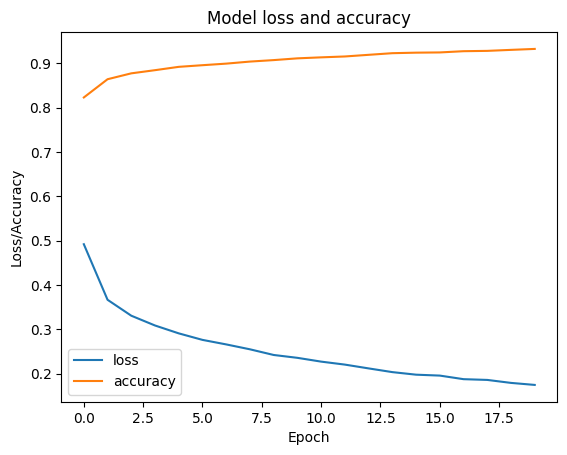

In [77]:
model.evaluate(x_test,y_test,verbose=1)
# Plotting the training history
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['accuracy'], label='accuracy')
plt.title('Model loss and accuracy')
plt.ylabel('Loss/Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [78]:
prob=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [79]:
result=[np.argmax(i) for i in prob]
result[:10]

[np.int64(9),
 np.int64(2),
 np.int64(1),
 np.int64(1),
 np.int64(6),
 np.int64(1),
 np.int64(4),
 np.int64(6),
 np.int64(5),
 np.int64(7)]

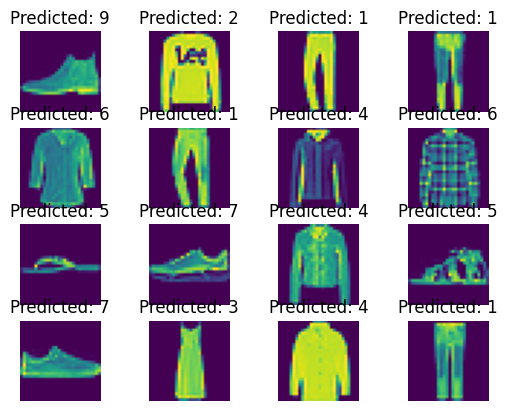

In [80]:
for i, image in enumerate(x_test[:16]):
    plt.subplot(4, 4, i+1)
    plt.imshow(image)
    plt.axis("off")
    plt.title(f"Predicted: {result[i]}")